# 탐색적 데이터 분석

## #01. 작업준비

### 1. 패키지 참조

In [4]:
import sys
sys.path.append('../')
import helper

import numpy as np
from pandas import read_excel, DataFrame, get_dummies, merge
from matplotlib import pyplot as plt
import seaborn as sb

### 2. 데이터 가져오기

In [5]:
origin = read_excel('분석용데이터.xlsx')
print(origin.shape)
print(origin.info())
origin.head()

(265928, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265928 entries, 0 to 265927
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   기준_년_코드    265928 non-null  int64 
 1   기준_분기_코드   265928 non-null  int64 
 2   Covid19    265928 non-null  int64 
 3   상권_코드      265928 non-null  int64 
 4   분기당_매출_금액  265928 non-null  int64 
 5   주중_매출_금액   265928 non-null  int64 
 6   주말_매출_금액   265928 non-null  int64 
 7   남성_매출_금액   265928 non-null  int64 
 8   여성_매출_금액   265928 non-null  int64 
 9   점포수        265928 non-null  int64 
 10  일과시간_금액    265928 non-null  int64 
 11  일과이후_금액    265928 non-null  int64 
 12  청년금액       265928 non-null  int64 
 13  중년금액       265928 non-null  int64 
 14  장년금액       265928 non-null  int64 
 15  상권_코드_명    265928 non-null  object
 16  엑스좌표_값     265928 non-null  int64 
 17  와이좌표_값     265928 non-null  int64 
 18  시군구_코드     265928 non-null  int64 
 19  행정동_코드     265928 non-null  int

,기준_년_코드,기준_분기_코드,Covid19,상권_코드,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,...,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구명,시군구코드,도심,총_직장_인구_수,총_생활인구_수
0,2018,3,0,1000094,182447499,181667733,779766,81108758,83644304,5,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175
1,2018,3,0,1000094,4561081,3428057,1133024,0,4561081,2,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175
2,2018,3,0,1000094,86293109,78208220,8084889,38252844,48040265,1,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175
3,2018,3,0,1000094,93941608,60508224,33433384,45574085,36140265,1,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175
4,2018,3,0,1000094,1692325089,1354744541,337580548,489138378,195886445,1,...,마장로39길,203915,452058,11200,11200540,성동구,11200,False,3118,1272175


#### 결측치 확인

In [6]:
print(origin.isna().sum())

기준_년_코드      0
기준_분기_코드     0
Covid19      0
상권_코드        0
분기당_매출_금액    0
주중_매출_금액     0
주말_매출_금액     0
남성_매출_금액     0
여성_매출_금액     0
점포수          0
일과시간_금액      0
일과이후_금액      0
청년금액         0
중년금액         0
장년금액         0
상권_코드_명      0
엑스좌표_값       0
와이좌표_값       0
시군구_코드       0
행정동_코드       0
시군구명         0
시군구코드        0
도심           0
총_직장_인구_수    0
총_생활인구_수     0
dtype: int64


### 3. 명목형 변수에 대한 데이터 타입 변경

In [7]:
df = origin.astype({
     '기준_년_코드': 'category',
    '기준_분기_코드':  'category',
    '상권_코드': 'category',
    '상권_코드_명': 'category',
    '시군구_코드': 'category',
    '행정동_코드': 'category',
    '시군구명': 'category',
    '시군구코드': 'category',
    'Covid19':'category',
    '도심': 'category',
    
})

## #02. 명목형 변수에 대한 기초 통계량 확인

### 각 컬럼의 데이터 타입 확인

In [8]:
df.dtypes

기준_년_코드      category
기준_분기_코드     category
Covid19      category
상권_코드        category
분기당_매출_금액       int64
주중_매출_금액        int64
주말_매출_금액        int64
남성_매출_금액        int64
여성_매출_금액        int64
점포수             int64
일과시간_금액         int64
일과이후_금액         int64
청년금액            int64
중년금액            int64
장년금액            int64
상권_코드_명      category
엑스좌표_값          int64
와이좌표_값          int64
시군구_코드       category
행정동_코드       category
시군구명         category
시군구코드        category
도심           category
총_직장_인구_수       int64
총_생활인구_수        int64
dtype: object

### 명목형변수의 이름을 추출



In [9]:
cnames = []

for i,v in enumerate(df.dtypes):
    if v == 'category':
        cnames.append(df.columns[i])

cnames

['기준_년_코드',
 '기준_분기_코드',
 'Covid19',
 '상권_코드',
 '상권_코드_명',
 '시군구_코드',
 '행정동_코드',
 '시군구명',
 '시군구코드',
 '도심']

### 명목형 변수로만 구성된 새로운 데이터프레임을 생성

In [10]:
cdf = df[cnames]
print(cdf.isna().sum())
cdf

기준_년_코드     0
기준_분기_코드    0
Covid19     0
상권_코드       0
상권_코드_명     0
시군구_코드      0
행정동_코드      0
시군구명        0
시군구코드       0
도심          0
dtype: int64


,기준_년_코드,기준_분기_코드,Covid19,상권_코드,상권_코드_명,시군구_코드,행정동_코드,시군구명,시군구코드,도심
0,2018,3,0,1000094,마장로39길,11200,11200540,성동구,11200,False
1,2018,3,0,1000094,마장로39길,11200,11200540,성동구,11200,False
2,2018,3,0,1000094,마장로39길,11200,11200540,성동구,11200,False
3,2018,3,0,1000094,마장로39길,11200,11200540,성동구,11200,False
4,2018,3,0,1000094,마장로39길,11200,11200540,성동구,11200,False
...,...,...,...,...,...,...,...,...,...,...
265923,2021,1,1,1000651,우마길,11530,11530595,구로구,11530,False
265924,2021,1,1,1000651,우마길,11530,11530595,구로구,11530,False
265925,2021,1,1,1000651,우마길,11530,11530595,구로구,11530,False
265926,2021,1,1,1000651,우마길,11530,11530595,구로구,11530,False


### 확인이 필요한 컬럼에 대한 카운트 플롯

같은 역할을 하는 컬럼은 지우기: 상권_코드_명, 시군구_코드, 행정동_코드, 시군구코드

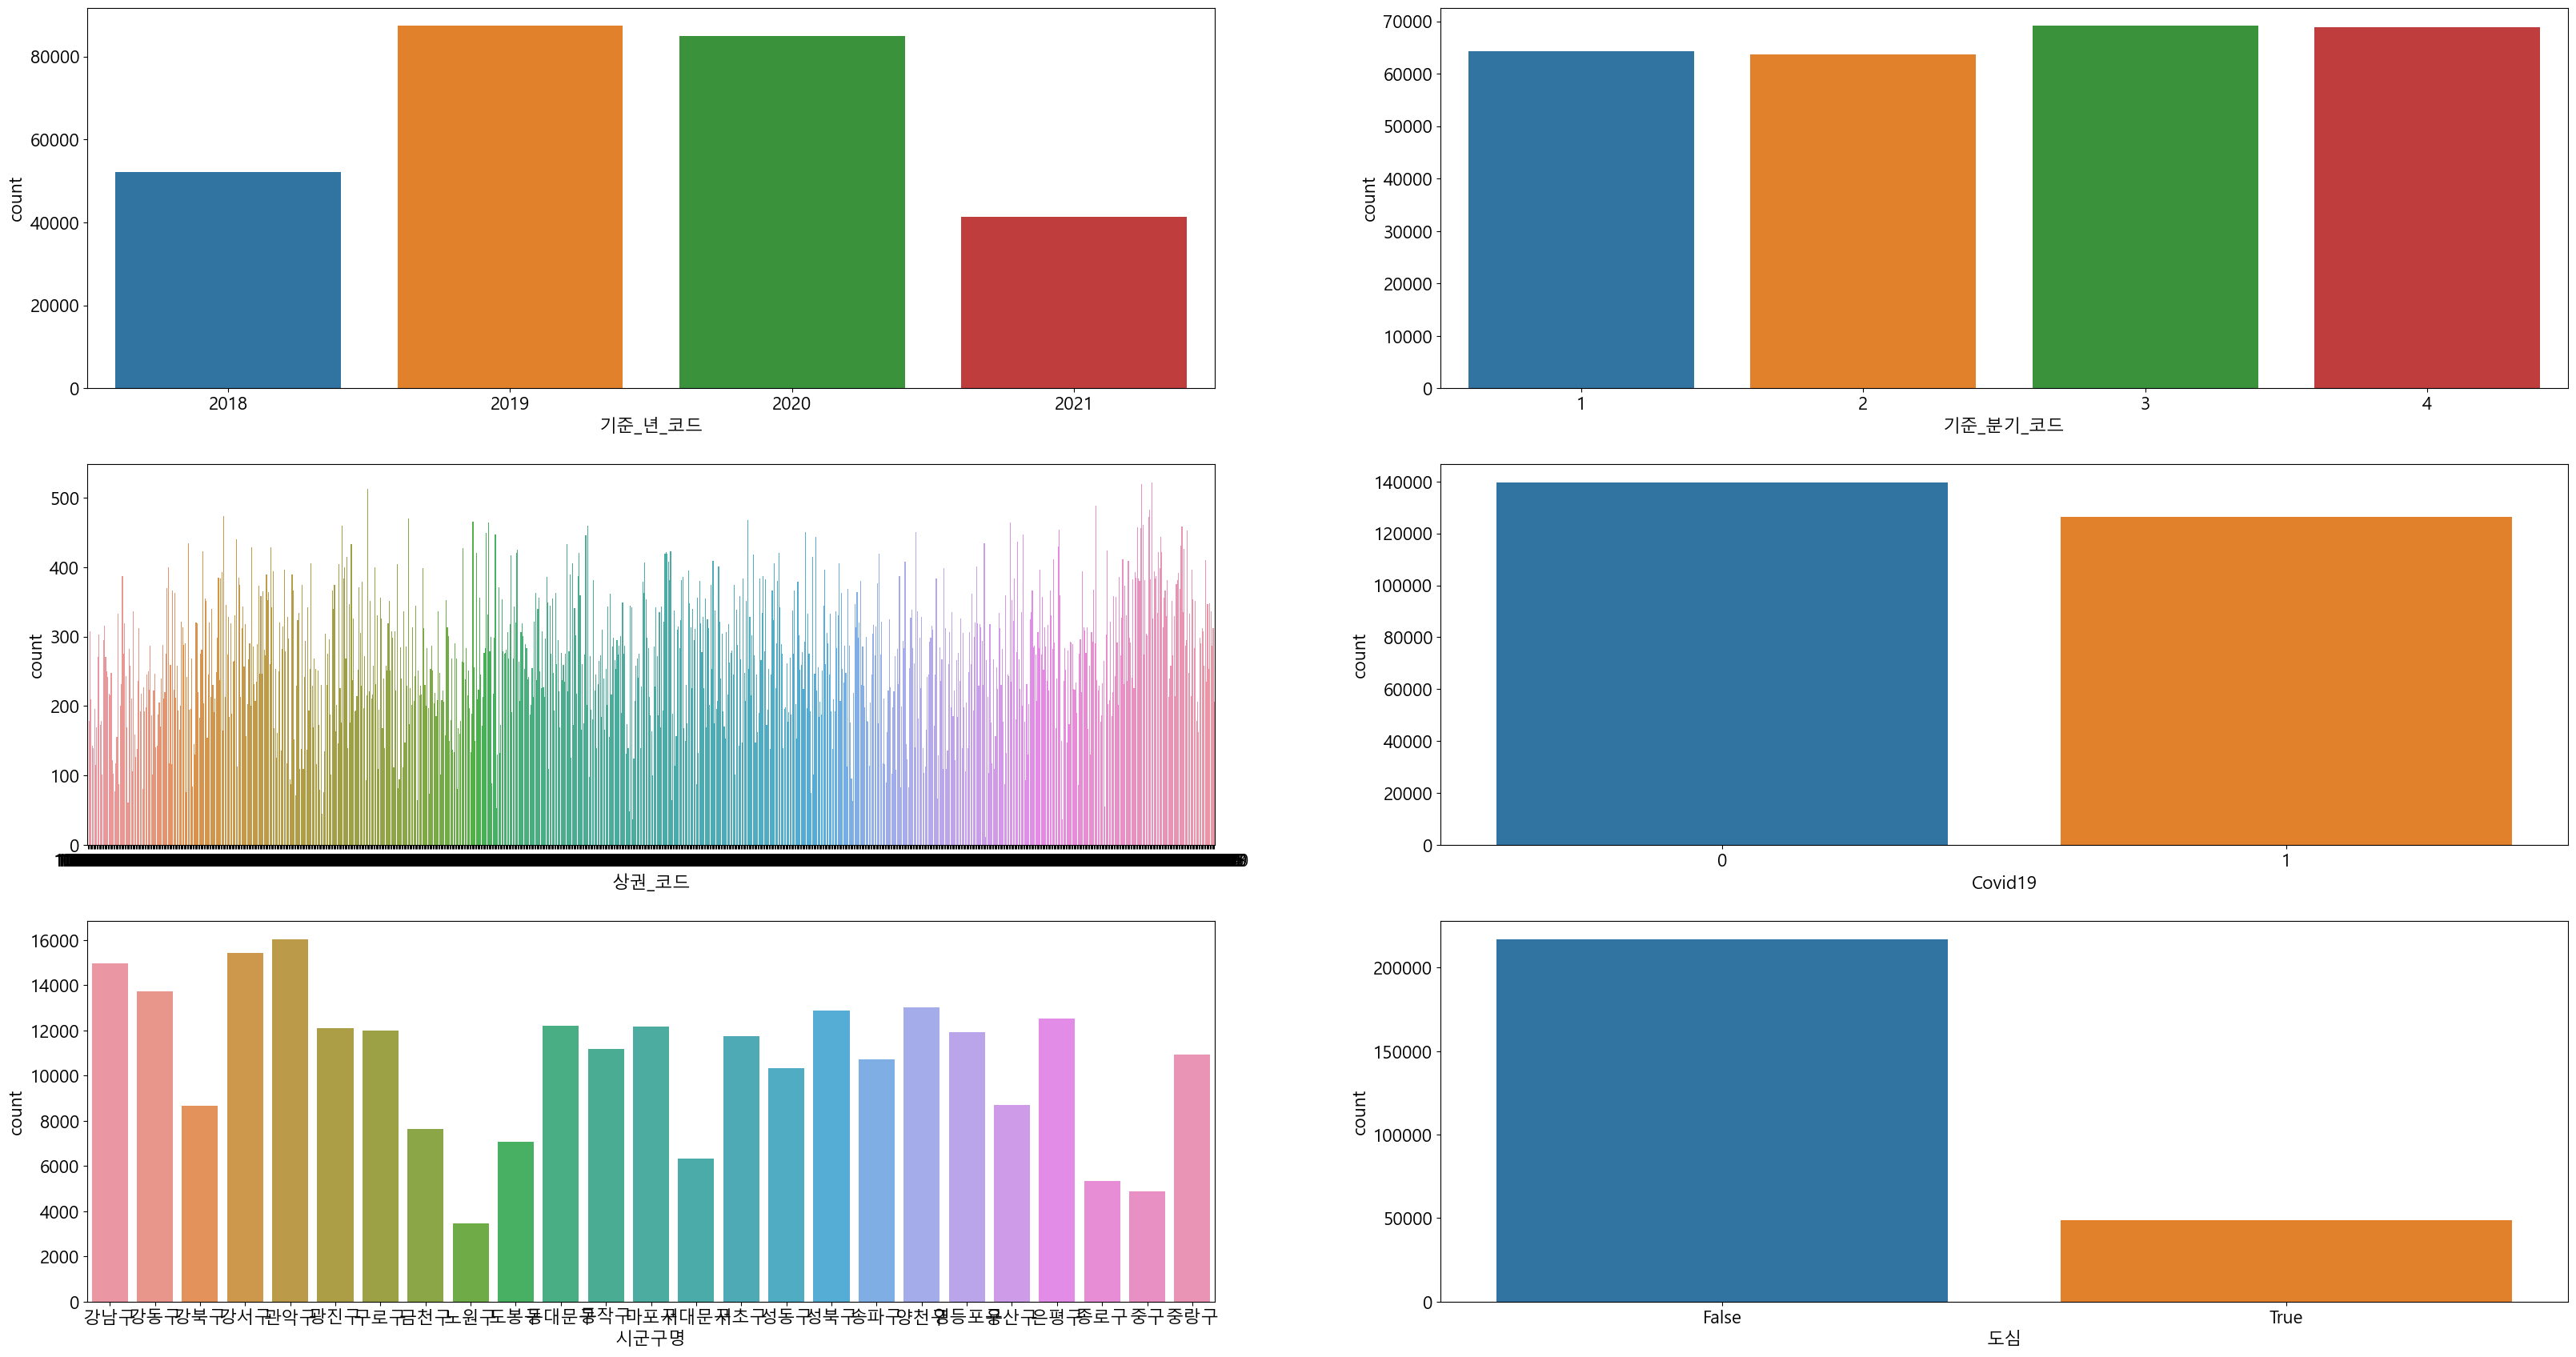

In [11]:
target = ['기준_년_코드','기준_분기_코드','상권_코드','Covid19','시군구명','도심']

rows = round(len(target)/2)

fig, ax = plt.subplots(rows, 2, figsize=(40, 7*rows))

for i,v in enumerate(target):
    r = int(i / 2)
    c = i % 2
    sb.countplot(x=v, data=cdf, ax=ax[r][c])

plt.show()
plt.close()

## #03. 연속형 변수에 대한 기초 통계량 확인

### 구 단위 코로나 전후 매출액 비교

In [12]:
tmp = df.filter(['시군구명', 'Covid19', '분기당_매출_금액']).groupby(['시군구명','Covid19'], as_index=False).mean()
print(tmp.isna().sum())
tmp

시군구명         0
Covid19      0
분기당_매출_금액    0
dtype: int64


,시군구명,Covid19,분기당_매출_금액
0,강남구,0,3.777450e+08
1,강남구,1,4.067136e+08
2,강동구,0,2.207858e+08
3,강동구,1,2.341338e+08
4,강북구,0,1.810091e+08
5,강북구,1,1.767230e+08
6,강서구,0,2.114053e+08
7,강서구,1,2.244594e+08
8,관악구,0,2.043014e+08
9,관악구,1,2.015775e+08


#### 비교 결과 시각화

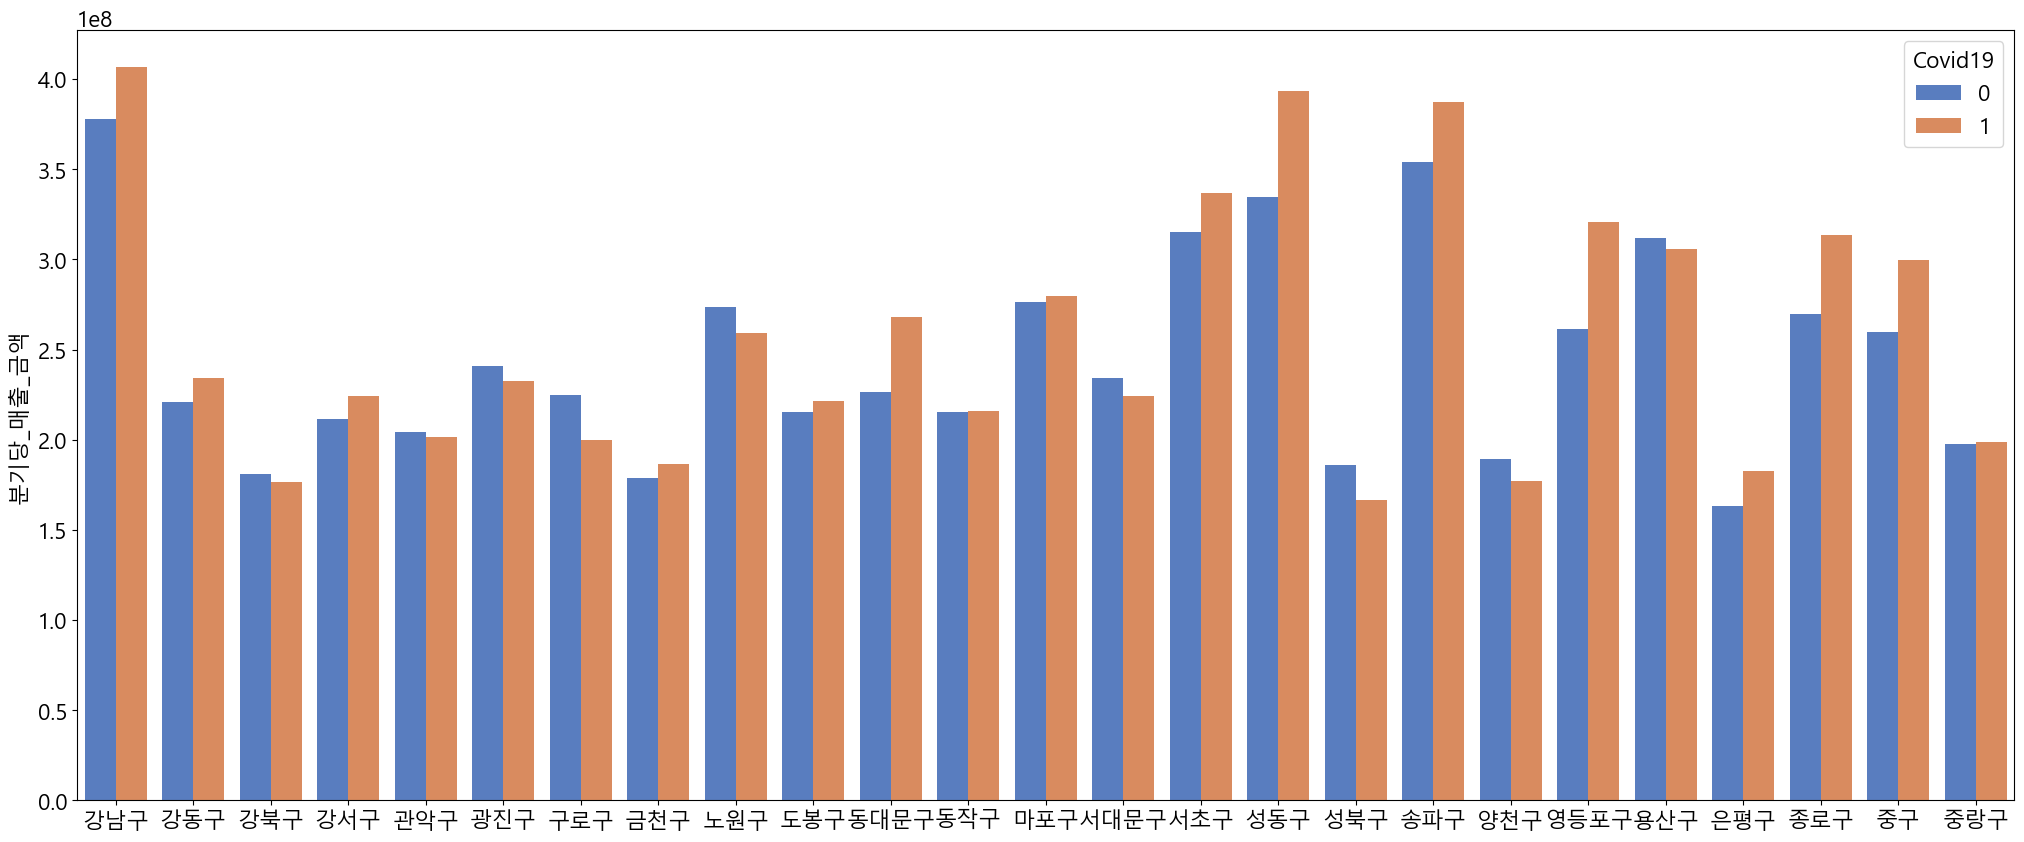

In [13]:
plt.figure(figsize=(25,10))
sb.barplot(data=tmp, x='시군구명', y='분기당_매출_금액', hue='Covid19', palette='muted')
plt.xlabel(None)
plt.savefig('구단위_매출평균_비교.png', dpi=200, pad_inches=0)
plt.show()
plt.close()

### 기초통계량 확인

In [14]:
tmp = df.drop(['엑스좌표_값', '와이좌표_값'], axis=1)
tmp.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
분기당_매출_금액,2.491156e+08,7.155273e+08,8.0,19385254.00,67958130.0,2.206690e+08,9.334306e+10
주중_매출_금액,1.890894e+08,5.802866e+08,-70301897.0,14401136.50,50635893.0,1.665412e+08,9.060803e+10
주말_매출_금액,6.002625e+07,1.844163e+08,-60053636.0,2470771.25,13580866.5,5.077027e+07,1.187360e+10
남성_매출_금액,1.211154e+08,3.546736e+08,0.0,7635753.25,30244104.5,1.046423e+08,4.468054e+10
여성_매출_금액,1.038996e+08,3.202041e+08,-7499697.0,6644129.75,26931961.0,9.149827e+07,2.358525e+10
점포수,4.665669e+00,6.393126e+00,0.0,2.00,3.0,5.000000e+00,3.900000e+02
일과시간_금액,1.367521e+08,4.979091e+08,-23926190.0,6570390.00,30422435.5,1.143886e+08,6.369344e+10
일과이후_금액,1.123635e+08,3.054073e+08,-86927726.0,6528123.75,26460168.5,9.311159e+07,2.964962e+10
청년금액,8.026617e+07,2.244493e+08,-3685222.0,3439479.50,16588339.0,6.560932e+07,1.568936e+10
중년금액,1.074401e+08,3.482783e+08,0.0,7668618.25,28746872.0,9.204336e+07,3.420627e+10


### 상자그림 확인

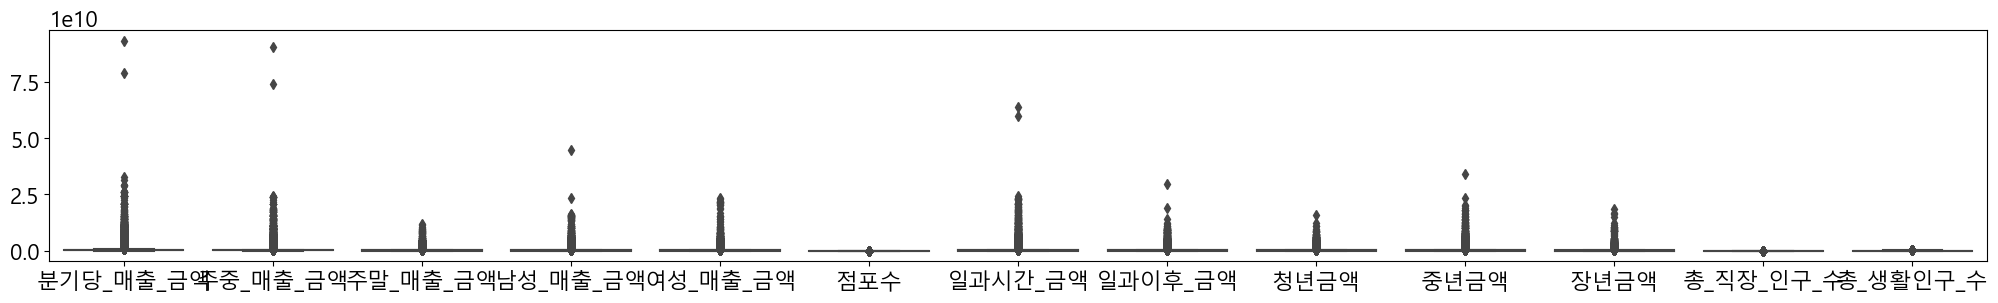

In [15]:
plt.figure(figsize=(25,3))
sb.boxplot(tmp)
plt.show()
plt.close()

## #04. 최종 데이터프레임 구성

In [20]:
df.to_excel("골목상권_코로나전후_매출액비교.xlsx", index=False)